In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),
                              key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [3]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines=fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [4]:
datingDataMat,datingLabels = file2matrix('./datingTestSet.txt')
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

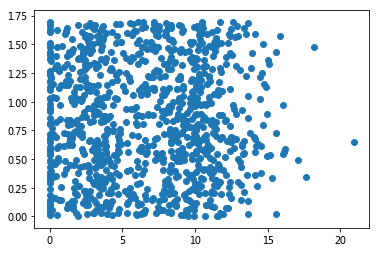

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

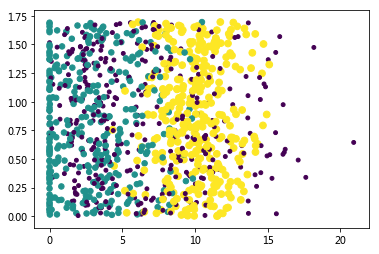

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

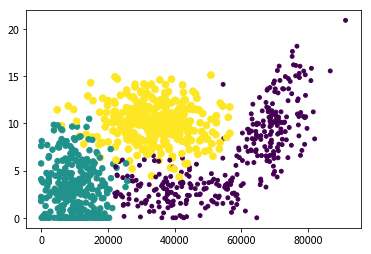

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],
15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

In [8]:
def autoNorm(dataSet):
    minVals= dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile (minVals, (m, 1) )
    normDataSet = normDataSet/np.tile(ranges, (m,1))
    return normDataSet,ranges,minVals

In [9]:
normMat,ranges,minVals = autoNorm(datingDataMat)
normMat,ranges,minVals

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

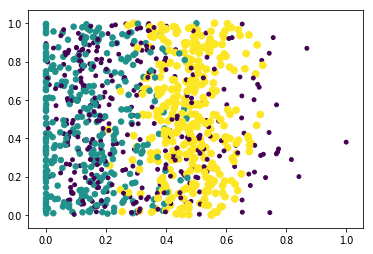

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(normMat[:,1], normMat[:,2],15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

In [11]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult=classify0(normMat[i,:],
                                   normMat[numTestVecs:m,:],
                                   datingLabels[numTestVecs:m],3)
        print("the classifier came back with:%d,the real answer is: %d"
             %(classifierResult,datingLabels[i]))
        if classifierResult!=datingLabels[i]:
            errorCount+=1.0
            print("the total error rate is: %f" %(errorCount/float(numTestVecs)))
        

In [28]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    testl=np.random.choice(normMat.shape[0],numTestVecs)
    trainl=[i for i in range(normMat.shape[0]) if i not in testl]
    normMat1=np.array([normMat[i,:] for i in trainl])
    datingLabels1=np.array([datingLabels[i] for i in trainl])
    errorCount=0.0
    for i in testl:
        classifierResult=classify0(normMat[i,:],
                                   normMat1,
                                   datingLabels1,3)
        print("the classifier came back with:%d,the real answer is: %d"
             %(classifierResult,datingLabels[i]))
        if classifierResult!=datingLabels[i]:
            errorCount+=1.0
            print("the total error rate is: %f" %(errorCount/float(numTestVecs)))
        


In [29]:
def datingClassTest2():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult=classify0(normMat[i,:],
                                   normMat[numTestVecs:m,:],
                                   datingLabels[numTestVecs:m],3)
        print("the classifier came back with:%d,the real answer is: %d"
             %(classifierResult,datingLabels[i]))
        if classifierResult!=datingLabels[i]:
            errorCount+=1.0
            print("the total error rate is: %f" %(errorCount/float(numTestVecs)))

In [30]:
datingClassTest()

the classifier came back with:1,the real answer is: 1
the classifier came back with:3,the real answer is: 3
the classifier came back with:3,the real answer is: 1
the total error rate is: 0.010000
the classifier came back with:3,the real answer is: 3
the classifier came back with:3,the real answer is: 3
the classifier came back with:3,the real answer is: 3
the classifier came back with:2,the real answer is: 2
the classifier came back with:3,the real answer is: 3
the classifier came back with:2,the real answer is: 2
the classifier came back with:1,the real answer is: 1
the classifier came back with:1,the real answer is: 1
the classifier came back with:2,the real answer is: 2
the classifier came back with:1,the real answer is: 1
the classifier came back with:2,the real answer is: 2
the classifier came back with:1,the real answer is: 1
the classifier came back with:3,the real answer is: 3
the classifier came back with:3,the real answer is: 3
the classifier came back with:1,the real answer 

In [52]:
def classifyPerson():
    resultList=['not at all','in small doses','in large doses']
    percentTats=float(input("percenttage of time spent playing video games?"))
    ffMiles=float(input("frequent flier miles earned per year?"))
    iceCream=float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    inArr=np.array([ffMiles,percentTats,iceCream])
    classifierResult=classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print("You will probaly like this person:",resultList[classifierResult-1])

In [53]:
classifyPerson()

percenttage of time spent playing video games?800
frequent flier miles earned per year?0
liters of ice cream consumed per year?0
You will probaly like this person: not at all
